# Tutorial 1

## Quick Visualization of Spectral Content

This tutorial demonstrates how `ARVE` can be used to quickly visualize spectral content in a specific wavelength range.

We begin by importing the `ARVE` package and other useful packages.

In [1]:
# Import packages
import arve
import matplotlib.pyplot as plt
import numpy             as np

Since `ARVE` contains an extensive library of pre-computed synthetic stellar and telluric spectra with associated line lists, it becomes very fast and simple to visualize and make use of tailored spectral data.

To obtain the relevant spectral data for one's star, an `ARVE` object is initiated and provided some elementary information. In this case, we decide to retrieve spectral data for the Sun between the wavelengths of 6480-6500 Å. Note that `ARVE` handles wavelengths in matrices of shape $(N_{\mathrm{ord}}, N_{\mathrm{pix}})$, where $N_{\mathrm{ord}}$ and $N_{\mathrm{pix}}$ are the number of orders and pixels, respectively. We also set the telluric threshold to 0.99 (meaning stellar lines in the vicinty of telluric lines deeper than 1% will be considered affected) and arbitrarily exclude the last part of the spectrum for demonstration.

In [2]:
# Initiate ARVE object, specify star, add wavelength grid and fetch auxiliary data
example = arve.ARVE()
example.star.target = "Sun"
example.star.get_stellar_parameters()
example.data.add_data(wave_val=np.arange(6480,6500+1e-6,0.01).reshape(1,-1))
example.data.get_aux_data(tell_lim=0.99, exclude_regions=[[6495,6500]])

Visualizing the data is then no more than one line of code (with many options)!

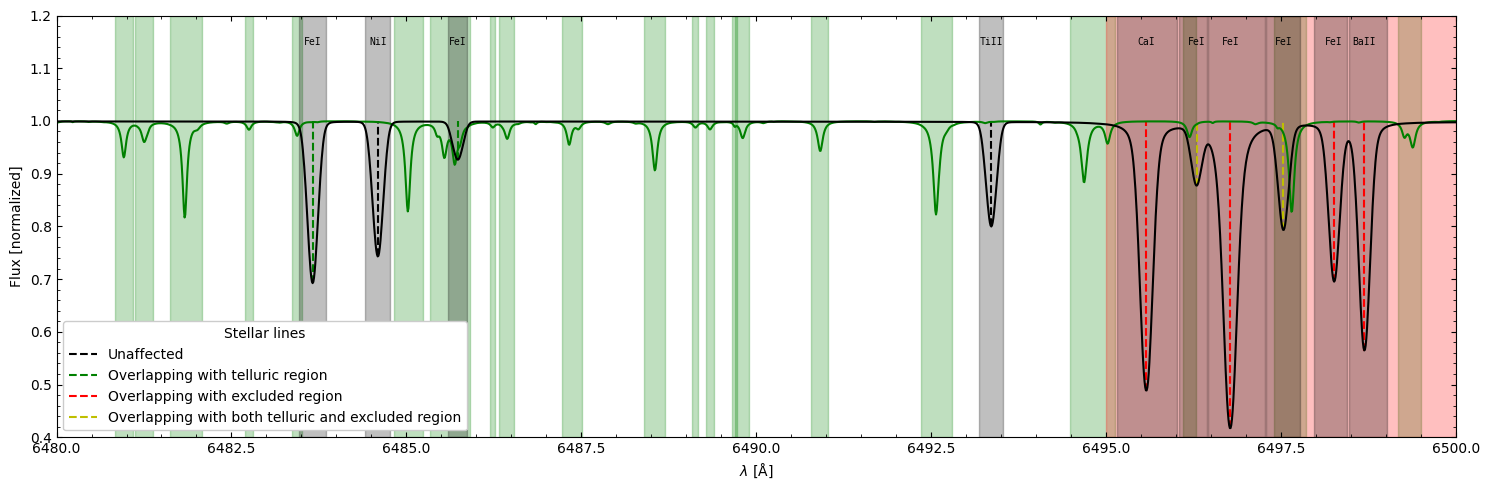

In [3]:
# Plot spectral data
fig = example.data.plot_spec_data(figsize=(15,5),
                                  include_obs_data=False,
                                  include_aux_data=True,
                                  plot_spec=True,
                                  plot_tell=True,
                                  plot_band=True,
                                  plot_excl=True,
                                  plot_mask=True,
                                  add_legend=True,
                                  annotate=True,
                                  ylim=[0.4,1.2])
plt.show(fig)

Finally, the progess until this point can be preserved by saving the entire `ARVE` object as a pickled file.

In [4]:
# Save ARVE object
example.id = "example_data/tutorial_1/example"
arve.save(example)